# Прогноз оттока клиентов

**В этом проекте мне предоставлены данные о некоторых клиентах компании ниединогоразрыва.ком. Я построю модель, предсказывающую уход клиентов.**

<a href='#conclusion'>Показать сразу вывод</a>

## Предобработка
Сначала загрузим и рассмотрим данные

In [1]:
import pandas as pd

from IPython.display import display

df_names = ['contract','internet','personal','phone']   #немножечко автоматизации

data = {}
for i in df_names:
    data[i] = pd.read_csv('/datasets/final_provider/'+ i +'.csv', index_col = 0)
    display(data[i].head())
    print(data[i].info(), '\n\n\n')   #для начала выведем на экран самую общую информацию о каждой таблице

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(6)
memory usage: 440.2+ KB
None 





,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(7)
memory usage: 344.8+ KB
None 





,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB
None 





,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
MultipleLines    6361 non-null object
dtypes: object(1)
memory usage: 99.4+ KB
None 





Все данные можно объедиить в одну таблицу по единому ключу. Однако мы видим, что не все клиенты пользуются и телефоном и интернетом, так что создадим заранее соответствующие столбцы

In [2]:
data['phone']['UsesPhone'] = 1   #поддерживаю стиль названий столбцов, навязанный датасетом
data['internet']['UsesInternet'] = 1  #я больше уважаю _, но когда стиль разный у разных столбцов -- это ужасно неудобно

При объединении у тех кто не пользуется одной из этих функций, будет пропуск в соответсвующем столбце, который легко зааполнить нулем. Теперь объединим всё.

In [3]:
df = (data['contract'].merge(data['personal'], 'left', on='customerID')
                      .merge(data['internet'], 'left', on='customerID')
                      .merge(data['phone'], 'left', on='customerID')
     )
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
UsesInternet        5517 non-null float64
MultipleLines       6361 non-null object
UsesPhone           6361 non-null float64
dtypes: float64(3), 

Исследуем данные повнимательнее

In [4]:
for i in df.columns:
    print( df[i].describe() ,'\n\n')

count           7043
unique            77
top       2014-02-01
freq             366
Name: BeginDate, dtype: object 


count     7043
unique       5
top         No
freq      5174
Name: EndDate, dtype: object 


count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Type, dtype: object 


count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object 


count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object 


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64 


count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object 


count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object 


count    7043.0000

Получив удобный датафрейм, можем приступать непосредственно к внесению изменений:
1. Удалим лишние столбцы, не несущие полезной информации. В данном случае такой только один -- пол [<a href='#p1'>↓</a>]
2. Видим небольшую мультиколинеарность в данных: Общая сумма выплат тесно связана с месячной оплатой и датой регистрации. Удалим её [<a href='#p1'>↓</a>]
3. Модели плохо работают с датами в чистом виде. Поэтому я посчитаю количество времени от начала регистрации до конца пользования (либо 1 февраля 2020, если они не ушли) [<a href='#p2'>↓</a>]
4. После объединения остались пропуски, их стоит заполнить. [<a href='#p3'>↓</a>]
5. Добавим целевой признак (0 - ушёл, 1 - остался). [<a href='#p4'>↓</a>]
6. Так же стоит удалить дату начала пользования, так как иначе мы получим утечку: если модель знает, когда клиент начал работу и сколько дней продержался, то неслложно понять, остался он к февралю 2020 или нет. [<a href='#p5'>↓</a>]

В остальном все данные выглядят вполне неплохо: в категориальных -- правильное количество категорий, в численных -- вполне правдоподобные числа. За исключением TotalCharges, там какие-то пробелы, но это не важно так как мы всё равно его удалим
<hr>

<a id='p1'></a>
Первые два пункта объединены в один. Удаление выбранных столбцов -- простая операция, занимающая одну строчку.

In [5]:
df.drop(['TotalCharges','gender'], 1, inplace=True)

<a id='p2'></a>
Столбцы удалены, теперь перед нами более интересная задача: посчитать время. Время буду считать в днях, так как это максимально возможная в данном случае точность, часы во всех строках стоят на нулях. Дни тоже веззде первое число, но в месяцахх разное количество дней, и не учитывая это, мы теряем точность. Ввиду сравнительно небольшого датафрейма могу легко позволить себе воспользоваться методом apply. Для подсчёта дней напишу отдельную функцию.

In [6]:
def get_passed_time(s):   
    
    begin = pd.to_datetime(s['BeginDate'], format='%Y-%m-%d')   #переведём дату в нужный формат
    end_str = s['EndDate']
    
    if end_str == 'No':
        end = pd.to_datetime('2020-02-01', format='%Y-%m-%d')
    else:
        end = pd.to_datetime(s['EndDate'], format='%Y-%m-%d')
        
    return (end-begin).days


df['DaysBeingClient'] = df.apply(get_passed_time, axis=1)
display(df.head())

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,UsesInternet,MultipleLines,UsesPhone,DaysBeingClient
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,0,Yes,No,DSL,No,Yes,No,No,No,No,1.0,NaN,NaN,31
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,0,No,No,DSL,Yes,No,Yes,No,No,No,1.0,No,1.0,1036
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,0,No,No,DSL,Yes,Yes,No,No,No,No,1.0,No,1.0,61
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,0,No,No,DSL,Yes,No,Yes,Yes,No,No,1.0,NaN,NaN,1371
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,0,No,No,Fiber optic,No,No,No,No,No,No,1.0,No,1.0,61


<a id='p3'></a>
Дни, как мы видим, посчитались вполне успешно. Теперь заполним пропуски. В столбцах UsesInternet и UsesPhone на месте пропусков должны быть нули, а в остальных я поставлю -1, так как нули там уже есть, и они несут другой смысл

In [7]:
df[['UsesPhone','UsesInternet']] = df[['UsesPhone','UsesInternet']].fillna(0)

df['UsesPhone'] = df['UsesPhone'].astype(int)  #почему-то он всё время заполняет float-ами, исправим вручную
df['UsesInternet'] = df['UsesInternet'].astype(int)


df = df.fillna('-1')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
UsesInternet        7043 non-null int64
MultipleLines       7043 non-null object
UsesPhone           7043 non-null int64
DaysBeingClient     7043 non-null int64
dtypes: float64(1), int64(4), object(15)
memory usage: 1.1+ MB
Non

<a id='p4'></a>
Теперь целевой признак. Здесь я снова использую apply, но отдельную функцию писать не буду, обойдусь и безымянной лямбдой

In [8]:
df['StillUses'] = df['EndDate'].apply(lambda x: 1 if x == 'No' else 0)   #обожаю тернарный оператор

<a id='p5'></a>
Столбцы с датой я не удалил вместе с другими в самом начале, так как до сих пор они были нужны. Но теперь можем смело с ними прощаться

In [9]:
df.drop(['BeginDate','EndDate'], 1, inplace=True)

Все, что я мог исправить, я исправил. Осмотрим ещё раз общую информацию и перейдём к следующей части

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
UsesInternet        7043 non-null int64
MultipleLines       7043 non-null object
UsesPhone           7043 non-null int64
DaysBeingClient     7043 non-null int64
StillUses           7043 non-null int64
dtypes: float64(1), int64(5), object(13)
memory usage: 1.1+ MB
None


Нужные столбцы, нужные типы, нужные значения, никаких пропусков, даже в названиях всё отлично. Больше ничего с данными сделать мы не сможем, так что идём дальше.

## Построение моделей

Начну я с градиентного бустинга, так как эта штука довольно универсальная и стабильно хорошо работающая. В данном случае, как я считаю, лучше всего будет использовать catboosting, который очень успешно справляется с категориальными признаками, ведь этих признаков у нас подавляющее большинство.<hr>

Кэтбустинг может кушать признаки в строковом формате, так что мне даже не придётся их перекодировать. Создадим переменные х и у, и разделим выборку на тестовую и тренировочную. Для теста оставим 20 процентов от всех данных

In [11]:
features = list(df.columns)
features.remove('StillUses')

X = df[features].copy()
y = df['StillUses']

print( 'features:', X.shape, '\ntarget:', y.shape)

features: (7043, 18) 
target: (7043,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Соберем названия "кошачьих" признаков в отдельной переменной

In [13]:
from catboost import CatBoostClassifier

cat_features = features.copy()

cat_features.remove('MonthlyCharges')
cat_features.remove('DaysBeingClient')
print(cat_features)

['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'UsesInternet', 'MultipleLines', 'UsesPhone']


In [14]:
from sklearn.metrics import roc_auc_score

params = {  #пока параметры ставлю на глаз, позже исследую этот момент детльнее
    'depth': 5,
    'iterations': 800,
    'l2_leaf_reg': 5,
    'learning_rate': 0.1,
    'random_strength': 10,
    'boosting_type': 'Ordered',
    'fold_len_multiplier': 2,
    }

model_cat = CatBoostClassifier(**params,
                               loss_function='Logloss',
                               eval_metric='AUC',
                               verbose=True,
                               random_state=1234)
model_cat.fit(X_train, y_train, cat_features=cat_features, verbose=200)
#оставляю verbose=200 потому что психологически приятно видеть что программа не повисла
preds = model_cat.predict(X_test)
print(roc_auc_score( y_test, preds ))

0:	total: 307ms	remaining: 4m 5s
200:	total: 34.9s	remaining: 1m 43s
400:	total: 1m 17s	remaining: 1m 17s
600:	total: 1m 59s	remaining: 39.5s
799:	total: 2m 41s	remaining: 0us
0.8414995807757202


0.84 -- сравнительно неплохой скор. Попробуем разные модели, но сначала посмотрим, какие признаки оказались самыми важными

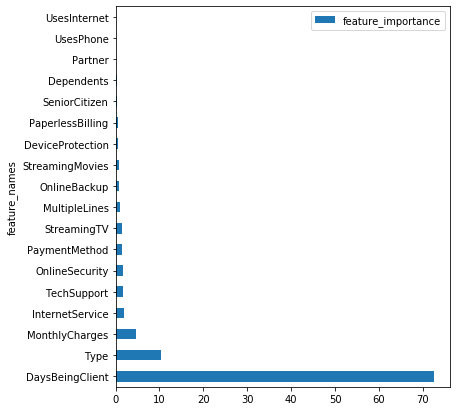

In [15]:
pd.DataFrame({'feature_importance': model_cat.get_feature_importance(),   
              'feature_names': X.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False).plot.barh(x='feature_names', figsize=(6,7))

Как это ни странно, использование интернета или телефона как отдельный признак -- практически не влияет на результат. Скорее всего это потому что использование внутренних функций интернета или телефона само по себе достаточно информативно. Можно попробовать либо избавиться от этих двух функций, либо от внутренних, оставив лишь эти две, и посмотреть на качество

In [16]:
new1_features = features.copy()
new1_features.remove('UsesInternet')
new1_features.remove('UsesPhone')

new2_features = ['Type','PaperlessBilling',
                  'PaymentMethod','MonthlyCharges','SeniorCitizen',
                  'Partner','Dependents','UsesInternet','UsesPhone', 'DaysBeingClient']

new1_cat_features = new1_features.copy()
new1_cat_features.remove('MonthlyCharges')
new1_cat_features.remove('DaysBeingClient')

new2_cat_features = new2_features.copy()
new2_cat_features.remove('MonthlyCharges')
new2_cat_features.remove('DaysBeingClient')

In [17]:
new1_X = df[new1_features].copy()

#мы используем тот же random_state, так что целевой признак остаётся одинаковым и для новых X
new1_X_train, new1_X_test = train_test_split(new1_X, test_size = 0.2, random_state = 42)  
model_cat.fit(new1_X_train, y_train, cat_features=new1_cat_features, verbose=200) 
preds = model_cat.predict(new1_X_test)
print(roc_auc_score( y_test, preds ))

0:	total: 115ms	remaining: 1m 32s
200:	total: 37.8s	remaining: 1m 52s
400:	total: 1m 25s	remaining: 1m 24s
600:	total: 2m 13s	remaining: 44.1s
799:	total: 2m 53s	remaining: 0us
0.8427326694752969


Крохотное улучшение есть. Теперь попробуем второй способ

In [18]:
new2_X = df[new2_features].copy()
new2_X_train, new2_X_test = train_test_split(new2_X, test_size = 0.2, random_state = 42)
model_cat.fit(new2_X_train, y_train, cat_features=new2_cat_features, verbose=200) 
preds = model_cat.predict(new2_X_test)
print(roc_auc_score( y_test, preds ))

0:	total: 6.32ms	remaining: 5.05s
200:	total: 6.75s	remaining: 20.1s
400:	total: 14.6s	remaining: 14.6s
600:	total: 22.6s	remaining: 7.5s
799:	total: 30.8s	remaining: 0us
0.8365128820892895


Так стало только хуже. Вообще, по хорошему, это нужно делать не вручную, а с помощью l1 регуляризации, но у кота эта функция не релизована. Попробуем обучить другие модели, и гиперпараметры на этот раз подберём не на глаз, а с помощью RandomizedSearchCV. <a id='corr'></a>
<hr>
Построим матрицу корреляции признаков, чтобы найти возможную мультиколлинеарность.

In [41]:
corr = df.corr()
display( corr[abs(corr) > 0.7])

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,UsesInternet,MultipleLines,UsesPhone,DaysBeingClient,StillUses
Type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.905491,NaN,0.710477,0.737104,NaN,0.820225,0.817842,0.763557,NaN,NaN,NaN,NaN
SeniorCitizen,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,NaN,NaN,NaN,0.905491,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.725645,0.723065,0.825819,NaN,NaN,NaN,NaN
OnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.705166,0.701690,0.735191,NaN,NaN,0.797084,NaN,NaN,NaN,NaN
OnlineBackup,NaN,NaN,NaN,0.710477,NaN,NaN,NaN,NaN,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,0.803663,NaN,NaN,NaN,NaN


Видим сильную зависимость месячной платы с функциями интернета. Оно и логично, ведь интернет, наверное, в компании дороже всего.  Однако несмотря на мультиколлинеарность, утечки памяти здесь никакой нет, и так как модель, как я уже показал, с фичами интернета работает лучше чем без них, я считаю, что полезнее будет их оставить.

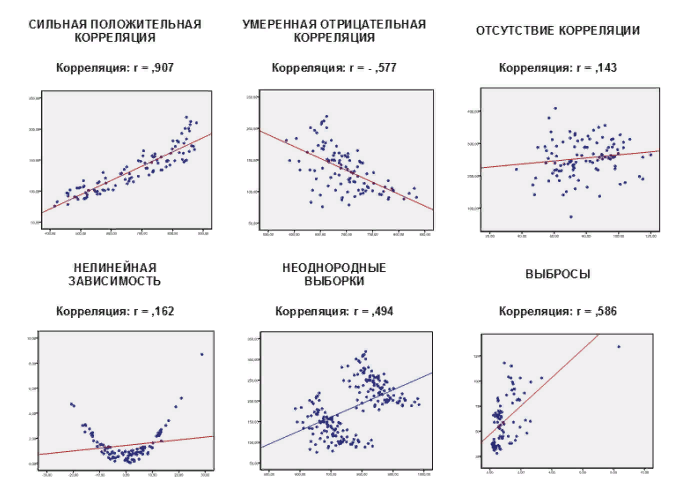

<hr>Обучать модели будем на признаках new1 (знаю что название не очень, но когда их только 1 и 2 -- это не настолько уж и неудобно)

Но сначала нам нужно избавится от строковых признаков, так как большинство моделей не умеет с ними работать. Закодировать их не будет сложно

In [19]:
from sklearn.preprocessing import OrdinalEncoder

columns_list = ['Type','InternetService','PaperlessBilling','PaymentMethod','Partner','Dependents',
                'OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','MultipleLines']


oe = OrdinalEncoder()
df[columns_list] = oe.fit_transform( df[columns_list] )

for i in columns_list:
    df[i] = df[i].astype(int)
display(df.head())

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,UsesInternet,MultipleLines,UsesPhone,DaysBeingClient,StillUses
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,2,29.85,0,1,0,1,1,2,1,1,1,1,1,0,0,31,1
5575-GNVDE,1,0,3,56.95,0,0,0,1,2,1,2,1,1,1,1,1,1,1036,1
3668-QPYBK,0,1,3,53.85,0,0,0,1,2,2,1,1,1,1,1,1,1,61,0
7795-CFOCW,1,0,0,42.30,0,0,0,1,2,1,2,2,1,1,1,0,0,1371,1
9237-HQITU,0,1,2,70.70,0,0,0,2,1,1,1,1,1,1,1,1,1,61,0


In [20]:
coded_X = df[new1_features].copy()
coded_X_train, coded_X_test = train_test_split(coded_X, test_size = 0.2, random_state = 42)

print( 'features:', coded_X.shape, '\ntarget:', y.shape )

features: (7043, 16) 
target: (7043,)


Теперь добавим немного автоматизации, так как нам придётся совершать одни и те же лействия с разными моделями.

In [21]:
from sklearn.model_selection import RandomizedSearchCV

def search_params(X, y, model, params):
    gscv = RandomizedSearchCV(estimator = model, param_distributions = params, scoring='roc_auc', cv=3, n_iter=10)
    gscv.fit(X,y)
    return gscv.best_params_

### Кэтбустинг
В библиотеке есть встроенная функция гридсёрча, но я не смог найти как в ней добавить категориальные признаки. Поэтому пойдём по классике. Сам процесс поиска закомментирован а вывод вынесен в маркдаун, дабы упростить жизнь проверяющему
> 'l2_leaf_reg': 8

> 'depth': 7

> 'random_strength': 5

In [22]:
model = CatBoostClassifier()
#params = {
#    'depth': range(5,12,2),
#    'iterations': [500],
#    'l2_leaf_reg': range(3,19,5),
#    'learning_rate': [0.8],
#    'random_strength': [5,10,16],
#    'boosting_type': ['Ordered'],
#    'fold_len_multiplier': [2],
#    'verbose': [500],
#    'cat_features': [new1_cat_features],
#    'loss_function': ['Logloss'],
#    'eval_metric': ['AUC']
#    }
#best_params = search_params( new1_X_train, y_train, model, params )
#print('Best parameters:', best_params)
best_params = {
            'depth': 7,
            'iterations': 800,
            'l2_leaf_reg': 8,
            'learning_rate': 0.1,
            'random_strength': 5,
            'boosting_type': 'Ordered',
            'fold_len_multiplier': 2,
    }
model = CatBoostClassifier(**best_params, cat_features=new1_cat_features, loss_function='Logloss',
                               eval_metric='AUC', verbose=200, random_state=1234)
model.fit(new1_X_train, y_train)
print( 'Score:', roc_auc_score(y_test, model.predict(new1_X_test)) )

0:	total: 15.5ms	remaining: 12.4s
200:	total: 20s	remaining: 59.7s
400:	total: 50.3s	remaining: 50.1s
600:	total: 1m 20s	remaining: 26.7s
799:	total: 1m 51s	remaining: 0us
Score: 0.8547970126388358


0.85. Вполне себе крепкий, приятный скор. Переходим наконец-то к остальным моделям

### Древо решений

In [23]:
from sklearn.tree import DecisionTreeClassifier

#по хорошему, этот код тоже надо обернуть в функцию, и мне очень стыдно его так сдавать
#но тут уже, к сожалению, дедлайн поджимает, я сутки непрерывно прогал, ух
model = DecisionTreeClassifier()
params = {
    'max_depth': [4,6,7,8,12],
    'max_features' : range(2,8),
    'min_samples_split' : range(2,6)
    }
best_params = search_params( coded_X_train, y_train, model, params )
print('Best parameters:', best_params)
model = DecisionTreeClassifier(**best_params, class_weight='balanced')   
model.fit(coded_X_train, y_train)
print( 'Score:', roc_auc_score(y_test, model.predict(coded_X_test)) )

Best parameters: {'min_samples_split': 2, 'max_features': 6, 'max_depth': 6}
Score: 0.7616994627718487


### Случайный лес

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = {
    'max_depth': [3,4,5,8],
    'max_features' : [5,6,7],
    'min_samples_split' : [2,3],
    'n_estimators' : range(400,701,100)
    }
best_params = search_params( coded_X_train, y_train, model, params )
print('Best parameters:', best_params)
model = RandomForestClassifier(**best_params, class_weight='balanced')
model.fit(coded_X_train, y_train)
print( 'Score:', roc_auc_score( y_test, model.predict(coded_X_test) ) )

Best parameters: {'n_estimators': 700, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 8}
Score: 0.8013834401233864


### Линейная регрессия

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(coded_X_train, y_train)
print( 'Score:', roc_auc_score(y_test, model.predict(coded_X_test)) )

Score: 0.7734972621031603


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### sklearn Gradient Boosting

Как и в прошлый раз, самый долгий код закомментирован, а вывод вынесен
> Best parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 400}

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
#params = {
#    'max_depth': [3,5,7],
#    'max_features' : [3,5,7],
#    'min_samples_split' : [2,3,4],
#    'n_estimators' : range(400,701,100),
#    'learning_rate': [0.1]
#    }
#best_params = search_params( coded_X_train, y_train, model, params )
#print('Best parameters:', best_params)
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=7, min_samples_split=2, n_estimators=800)
model.fit(coded_X_train, y_train)
print( 'Score:', roc_auc_score(y_test, model.predict(coded_X_test)) )

Score: 0.8197296779736458


Итог: кэтбуст показал всем мастер-класс. Осталось только вывести акьюраси и можно завершать проект.

In [27]:
from sklearn.metrics import accuracy_score

#придётся прогнать её заново, потому что я дурачок
best_params = {
            'depth': 7,
            'iterations': 800,
            'l2_leaf_reg': 8,
            'learning_rate': 0.1,
            'random_strength': 5,
            'boosting_type': 'Ordered',
            'fold_len_multiplier': 2,
    }
model = CatBoostClassifier(**best_params, cat_features=new1_cat_features, loss_function='Logloss',
                               eval_metric='AUC', verbose=200, random_state=1234)
model.fit(new1_X_train, y_train)
print( 'Accurasy:', accuracy_score(y_test, model.predict(new1_X_test)) )

0:	total: 11.9ms	remaining: 9.5s
200:	total: 18.4s	remaining: 54.9s
400:	total: 46.9s	remaining: 46.7s
600:	total: 1m 15s	remaining: 25.1s
799:	total: 1m 44s	remaining: 0us
Accurasy: 0.9063165365507452


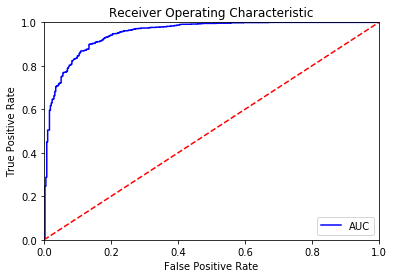

Precision: 0.9131627056672761 
Recall: 0.9642857142857143


In [39]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score

probs = model.predict_proba(new1_X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

preds = model.predict(new1_X_test)
print( 'Precision:', precision_score(y_test, preds), '\nRecall:', recall_score(y_test, preds) )

Полнота выше точности. Это значит, что модель ошибки модели чаще False Positive, чем False Negative. Так как в нашём случае True -- это "остался", то, получается, модель хорошо находит всех кто остался, но к ним по ошибке добавляет ещё и тех кто на самом деле ушёл. Хорошо это или плохо - судить маркетологам

<a id='conclusion'></a>
# Вывод
1. Я получил модель, предсказывающую отток клиентов с достаточно высокой точностью (accuracy=90.6%, roc_auc=0.85).
2. Так же я выяснил, что главным образом поведение уходящих клиентов определяется временем, которое они провели в компании
3. В столбце TotalCharges в некоторых записях стоят пробелы вместо чисел. Есть мнение, что это люди, не успевшие ничего заплатить, однако проверить это я не успел. Тем не менее, стоит сообщить дата инженерам компании.
4. Модель хорошо находит всех кто остался, но к ним по ошибке добавляет ещё и тех кто на самом деле ушёл.